In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#import OpenWeather API key
from api_keys import weather_api_key

#import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
#empty list for holding latitude and latitude coordinates
lat_lngs = []

#empty list for holding cities
cities = []

#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#create random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


## Plots to Showcase the Relationship Between Weather Variables and Latitude

In [3]:
#set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#define an empty list to fetch the weather data for each city
city_data = []

#print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    #create endpoint URL with each city
    city_url = query_url + city
    
    #log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #add 1 to the record count
    record_count += 1

    #run an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    

        #parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | lompoc
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | samusu
City not found. Skipping...
Processing Record 6 of Set 1 | juliaca
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | kaduna
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | road town
Processing Record 11 of Set 1 | monte alegre de sergipe
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | georgiyevka
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | yar-sale
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | rikitea
Process

Processing Record 35 of Set 4 | san vicente
Processing Record 36 of Set 4 | diffa
Processing Record 37 of Set 4 | tilichiki
Processing Record 38 of Set 4 | smoky lake
Processing Record 39 of Set 4 | te anau
Processing Record 40 of Set 4 | praia da vitoria
Processing Record 41 of Set 4 | yellowknife
Processing Record 42 of Set 4 | fairbanks
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | bolgatanga
Processing Record 45 of Set 4 | koumac
Processing Record 46 of Set 4 | vostok
Processing Record 47 of Set 4 | kosh-agach
Processing Record 48 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 49 of Set 4 | luderitz
Processing Record 0 of Set 5 | kautokeino
Processing Record 1 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5 | itoman
Processing Record 3 of Set 5 | roald
Processing Record 4 of Set 5 | grande prairie
Processing Record 5 of Set 5 | verkhnevilyuysk
Processing Record 6 of Set 5 | shache
Processing Record 7 of Set

Processing Record 24 of Set 8 | candawaga
City not found. Skipping...
Processing Record 25 of Set 8 | rawlins
Processing Record 26 of Set 8 | saleaula
City not found. Skipping...
Processing Record 27 of Set 8 | paamiut
Processing Record 28 of Set 8 | karpathos
Processing Record 29 of Set 8 | lorengau
Processing Record 30 of Set 8 | palmer
Processing Record 31 of Set 8 | angra
City not found. Skipping...
Processing Record 32 of Set 8 | bargal
City not found. Skipping...
Processing Record 33 of Set 8 | baijiantan
Processing Record 34 of Set 8 | college
Processing Record 35 of Set 8 | batagay
Processing Record 36 of Set 8 | bafra
Processing Record 37 of Set 8 | ust-shonosha
Processing Record 38 of Set 8 | puerto lopez
Processing Record 39 of Set 8 | spornoye
Processing Record 40 of Set 8 | saint-denis
Processing Record 41 of Set 8 | alta floresta
Processing Record 42 of Set 8 | umm bab
Processing Record 43 of Set 8 | mirabad
Processing Record 44 of Set 8 | laguna
Processing Record 45 of S

City not found. Skipping...
Processing Record 13 of Set 12 | brandenburg
Processing Record 14 of Set 12 | kizukuri
Processing Record 15 of Set 12 | isla mujeres
Processing Record 16 of Set 12 | mazara del vallo
Processing Record 17 of Set 12 | tromso
Processing Record 18 of Set 12 | chapais
Processing Record 19 of Set 12 | broken hill
Processing Record 20 of Set 12 | avera
Processing Record 21 of Set 12 | nabire
Processing Record 22 of Set 12 | bolonchen
City not found. Skipping...
Processing Record 23 of Set 12 | dawlatabad
Processing Record 24 of Set 12 | maracacume
Processing Record 25 of Set 12 | kamaishi
Processing Record 26 of Set 12 | ossora
Processing Record 27 of Set 12 | maceio
Processing Record 28 of Set 12 | drumheller
Processing Record 29 of Set 12 | hay river
Processing Record 30 of Set 12 | roanoke
Processing Record 31 of Set 12 | belyy yar
Processing Record 32 of Set 12 | frankfort
Processing Record 33 of Set 12 | igarka
Processing Record 34 of Set 12 | ullapool
Process

In [4]:
#convert cities weather data into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#show record count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
#display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,17.32,78,100,4.73,ZA,1675031135
1,lompoc,34.6391,-120.4579,13.90,78,75,3.60,US,1675031567
2,mataura,-46.1927,168.8643,22.05,50,93,1.36,NZ,1675031608
3,juliaca,-15.5000,-70.1333,10.35,63,100,4.44,PE,1675031612
4,castro,-24.7911,-50.0119,17.64,95,83,0.04,BR,1675031612


In [6]:
#export city data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
#read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

#display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,17.32,78,100,4.73,ZA,1675031135
1,lompoc,34.6391,-120.4579,13.90,78,75,3.60,US,1675031567
2,mataura,-46.1927,168.8643,22.05,50,93,1.36,NZ,1675031608
3,juliaca,-15.5000,-70.1333,10.35,63,100,4.44,PE,1675031612
4,castro,-24.7911,-50.0119,17.64,95,83,0.04,BR,1675031612


## Latitude vs. Temperature Plots

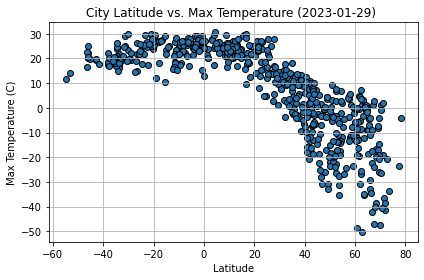

In [53]:
#build scatter plot
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.tight_layout()
plt.show()



## Latitude vs. Humidity

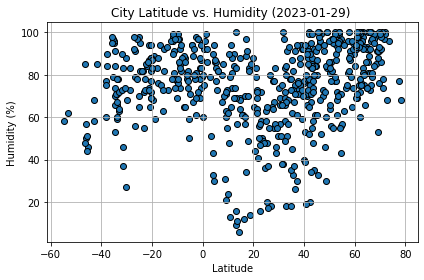

In [54]:
#build scatter plot
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Humidity (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness

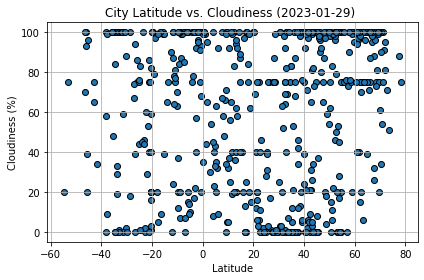

In [55]:
#build scatter plot
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed

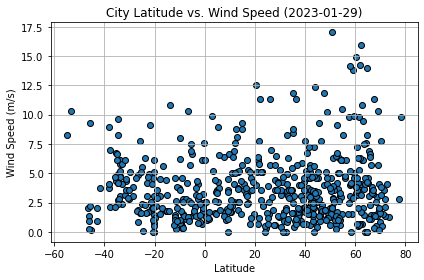

In [56]:
#build scatter plot
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")

plt.xlabel("Latitude")
#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.tight_layout()
plt.show()

## Linear Regression for Each Relationship

In [23]:
#define a function to create Linear Regression plots
def regression_plots(x_values,y_values,title, y_label, line_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()


In [24]:
#create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lompoc,34.6391,-120.4579,13.90,78,75,3.60,US,1675031567
5,kaduna,10.5222,7.4383,26.27,48,92,1.73,NG,1675031613
7,road town,18.4167,-64.6167,25.05,83,20,4.63,VG,1675031613
9,dikson,73.5069,80.5464,-33.67,96,51,1.28,RU,1675031615
10,georgiyevka,43.0369,74.7114,-9.98,85,99,3.00,KZ,1675031617


In [25]:
#create a DataFrame with the Southern Hemisphere data (Latitude > 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,17.32,78,100,4.73,ZA,1675031135
2,mataura,-46.1927,168.8643,22.05,50,93,1.36,NZ,1675031608
3,juliaca,-15.5000,-70.1333,10.35,63,100,4.44,PE,1675031612
4,castro,-24.7911,-50.0119,17.64,95,83,0.04,BR,1675031612
6,cape town,-33.9258,18.4232,19.39,59,0,5.81,ZA,1675031589


## Temperature vs. Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: -0.8089092432187829


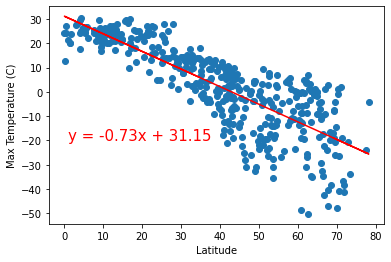

In [30]:
#linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regression_plots(x_values,y_values,"Northern Hemisphere: Temperature vs. Latitude Linear Regression", 
                 "Max Temperature (C)", (1,-20))

The r-value is: 0.44123834734752254


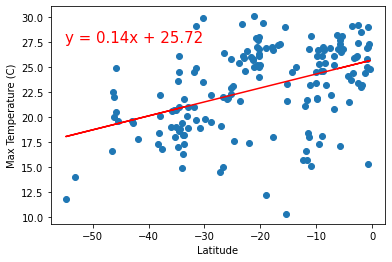

In [35]:
#linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regression_plots(x_values,y_values,"Southern Hemisphere: Temperature vs. Latitude Linear Regression", 
                 "Max Temperature (C)", (-55, 27.5))

### Insights: Temperature vs. Latitude
- The linear plots show that there is correlation between temperature and distance to the equator. In both hemispheres, the farther a city is from the equator, the colder the temperature is. Also, the closer the cities are, the warmer the temperatures. 

## Humidity vs. Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: 0.4071719689640517


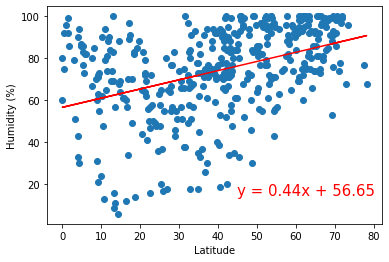

In [40]:
#northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regression_plots(x_values,y_values,"Northern Hemisphere: Humidity vs. Latitude Linear Regression", 
                 "Humidity (%)", (45,15))

The r-value is: 0.35782601448650647


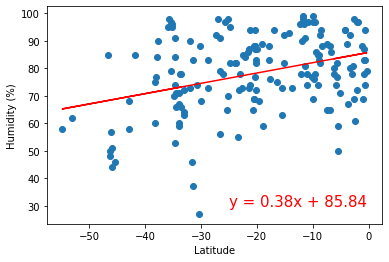

In [42]:
#southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regression_plots(x_values,y_values,"Southern Hemisphere: Humidity vs. Latitude Linear Regression", 
                 "Humidity (%)", (-25, 30))

### Insights: Humidity vs. Latitude
- There is a positve, although weak, correlation between humidity and latitude. Cities of higher altitudes are more humid. 

## Cloudiness vs . Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: 0.30642242046724866


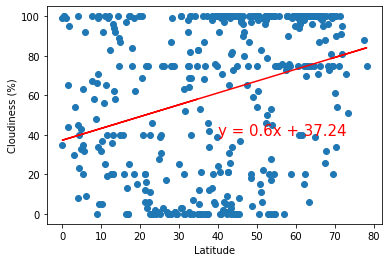

In [45]:
#northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regression_plots(x_values,y_values,"Northern Hemisphere: Cloudiness vs. Latitude Linear Regression", 
                 "Cloudiness (%)", (40,40))

The r-value is: 0.09442409484875099


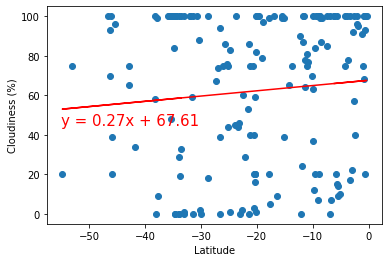

In [48]:
#southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regression_plots(x_values,y_values,"Southern Hemisphere: Cloudiness vs. Latitude Linear Regression", 
                 "Cloudiness (%)", (-55, 45))

### Insights: Cloudiness vs. Latitude
- There is no correlation between cloudiness and latitude. Cities vary on cloudiness percentage no matter their location. 

## Wind Speed vs. Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: 0.056921483941352456


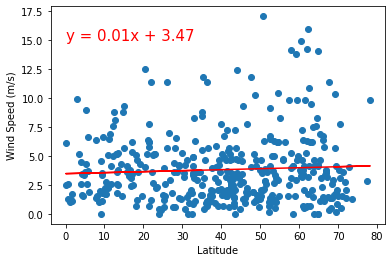

In [49]:
#northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regression_plots(x_values,y_values,"Northern Hemisphere: Wind Speed vs. Latitude Linear Regression", 
                 "Wind Speed (m/s)", (0,15))

The r-value is: -0.23945234766751922


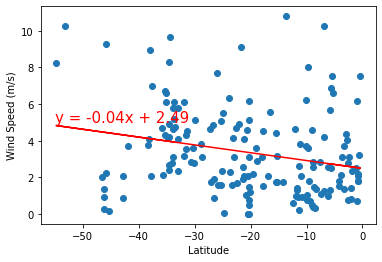

In [52]:
#southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regression_plots(x_values,y_values,"Southern Hemisphere: Wind Speed vs. Latitude Linear Regression", 
                 "Wind Speed (m/s)", (-55, 5))

### Insights: Wind Speed vs. Latitude
- In the southern hemisphere, the wind speed lessens as citites approach the equator. Although, there is no pattern on wind speed and latitude. Overall, there is little to no correlation between wind speeds and latitude.